<a href="https://colab.research.google.com/github/guillermocalderon2021/tfm-words-embeddings/blob/main/EDOSB_ModelosClasicosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargando dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/data/edos/')

import pandas as pd
df = pd.read_csv("edos_labelled_aggregated.csv")
df.head()

Mounted at /content/drive


,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
3,sexism2022_english-13021,woman?,not sexist,none,none,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_syn = pd.read_csv("edos_aug_eda.csv")
#df_syn = df_syn.drop(columns=['__index_level_0__'])
df_syn.head()
print(df_syn.shape)

(20000, 6)


In [ ]:
df_train_original = df[df['split']=='train']
df_dev = df[df['split']=='dev']
df_test = df[df['split']=='test']

In [ ]:
#df_train = pd.concat([df_train_original, df_syn[df_syn['split']=='train']])
df_train = pd.concat([df_train_original])
print(df_train_original.shape)
print(df_train.shape)

(14000, 6)
(14000, 6)


In [ ]:
df_train = df_train[df_train['label_category']!='none']
df_dev = df_dev[df_dev['label_category']!='none']
df_test = df_test[df_test['label_category']!='none']
print(df_train.shape)

(3398, 6)


In [ ]:

X_train = df_train['text'].fillna('')
X_val = df_dev['text'].fillna('')
X_test= df_test['text'].fillna('')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X_train = X_train.apply(preprocess)
X_val = X_val.apply(preprocess)
X_test = X_test.apply(preprocess)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajusta el codificador y transforma las etiquetas de texto a números
y_train_num = label_encoder.fit_transform(df_train['label_category'])
y_val_num = label_encoder.transform(df_dev['label_category'])
y_test_num = label_encoder.transform(df_test['label_category'])
# Obtener los nombres de las etiquetas
label_names = label_encoder.inverse_transform(range(len(set(y_train_num))))
print(y_test_num)


[1 1 1 1 1 2 1 2 3 3 0 1 2 2 2 0 2 2 0 1 2 2 2 2 1 1 1 2 1 1 1 0 1 2 2 1 1
 2 2 1 0 1 3 3 0 2 2 3 3 2 2 1 1 1 1 0 2 2 2 1 0 2 2 1 1 3 1 1 1 1 1 2 3 2
 1 2 2 2 2 0 1 2 0 2 1 1 3 1 2 1 3 2 2 0 3 3 0 2 2 2 2 2 0 1 2 3 3 1 2 2 3
 1 2 2 2 1 1 2 2 0 2 2 2 2 3 1 2 3 2 2 1 2 2 1 2 1 1 0 0 2 1 3 2 2 1 1 3 2
 1 2 1 0 2 1 3 2 1 1 1 3 2 1 1 1 2 1 0 1 2 1 1 1 0 2 2 2 1 2 1 2 2 2 2 0 2
 2 1 2 1 1 1 1 1 1 3 1 0 1 0 1 3 2 3 1 2 2 1 2 1 1 1 2 2 1 3 2 1 1 2 1 2 1
 1 2 1 2 1 2 1 1 2 1 1 3 1 2 0 0 1 2 1 2 2 1 2 1 1 1 1 1 2 0 0 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 1 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 1 1 3 3 0 1 3 3 1 2 2 1 2 3 1 1 2 2 1 3 2 0 1 3 2 0
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 3 1 2 0 1 2 2 2 2 1 1 0 0 2 1
 3 1 1 1 0 2 1 2 3 2 0 1 1 1 1 2 1 2 2 0 2 1 3 3 2 2 1 1 1 2 1 3 1 1 2 2 2
 2 2 1 1 1 1 2 1 1 1 1 3 1 2 1 0 1 2 2 2 1 2 3 1 2 1 1 2 1 1 1 3 2 0 2 1 1
 1 3 2 2 3 1 3 1 0 2 2 2 1 1 1 2 1 2 1 1 0 2 1 3 2 2 1 2 2 1 1 1 1 1 3 2 1
 1 2 2 1 3 1 1 0 1 1 3 1 

# Frecuencias

In [ ]:
# Frecuencias
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectors_train = vectorizer.fit_transform(X_train)
vectors_val = vectorizer.transform(X_val)
vectors_test = vectorizer.transform(X_test)


In [ ]:
# Para validación cruzada
from scipy.sparse import vstack
import numpy as np

vectors_train = vstack([vectors_train, vectors_val])


In [ ]:
y_train_num=np.concatenate((y_train_num,y_val_num))

## TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
vectors_val = vectorizer.transform(X_val)
vectors_test = vectorizer.transform(X_test)

In [ ]:
# Para validación cruzada
from scipy.sparse import vstack
import numpy as np

vectors_train = vstack([vectors_train, vectors_val])


In [ ]:
y_train_num=np.concatenate((y_train_num,y_val_num))

# Embedding estaticos

In [ ]:
def vectorize_text(text, model):
    vectors = [model[word] for word in text.split() if word in model]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
models=['fasttext-wiki-news-subwords-300',  'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100',
        'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200']
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load(''word2vec-google-news-300')

# Use the downloaded vectors as usual:
glove_vectors.most_similar('twitter')
[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [ ]:
import gensim.downloader
word2_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')
#embeddings_path = '/content/drive/My Drive/Eglove-twitter-100mbeddings/word2vec-google-news-300.bin.gz'
#word2_vectors.save_word2vec_format(embeddings_path, binary=True)

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
import numpy as np
vectors_train = np.array([vectorize_text(text, word2_vectors) for text in X_train])
vectors_val = np.array([vectorize_text(text, word2_vectors) for text in X_val])
vectors_test = np.array([vectorize_text(text, word2_vectors) for text in X_test])

In [ ]:
vocab_size=len(word2_vectors.key_to_index)
print(vocab_size)

999999


In [ ]:
# Para validacion cruzada
vectors_train=np.concatenate((vectors_train,vectors_val))


In [ ]:
y_train_num=np.concatenate((y_train_num,y_val_num))

# Entrenando embeddings

In [ ]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=300, window=5, min_count=5, workers=4)

In [ ]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
vectors_train = np.array([vectorize(sentence) for sentence in X_train])
vectors_val = np.array([vectorize(sentence) for sentence in X_val])
vectors_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
print(X_train.shape)

(3398,)


In [ ]:
# Para validacion cruzada
vectors_train=np.concatenate((vectors_train,vectors_val))

In [ ]:
y_train_num=np.concatenate((y_train_num,y_val_num))

# SVM

In [ ]:
print(vectors_train.shape)
print(vectors_val.shape)
print(y_train_num.shape)


(3884, 300)
(486, 300)
(3884,)


In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Definir el clasificador SVM
svm_clf = SVC()

# Definir la grilla de parámetros para la búsqueda
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Realizar la búsqueda en grilla con validación cruzada
grid_search = HalvingGridSearchCV(svm_clf, param_grid, cv=3, scoring='f1_micro',verbose=3)
grid_search.fit(vectors_train, y_train_num)

# Obtener el mejor clasificador
best_svm_clf = grid_search.best_estimator_


# Evaluar el mejor clasificador en el conjunto de prueba
y_test_pred = best_svm_clf.predict(vectors_test)
print('Métricas en el conjunto de prueba:')
print(classification_report(y_test_num, y_test_pred,target_names=label_names))
micro_f1 = f1_score(y_test_num, y_test_pred, average='micro')
print('Micro-F1 Score: {:.4f}'.format(micro_f1))

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 143
max_resources_: 3884
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 143
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.453, test=0.532) total time=   0.0s
[CV 2/3] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.568, test=0.426) total time=   0.0s
[CV 3/3] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.421, test=0.574) total time=   0.0s
[CV 1/3] END C=0.1, gamma=1, kernel=linear;, score=(train=0.453, test=0.532) total time=   0.0s
[CV 2/3] END C=0.1, gamma=1, kernel=linear;, score=(train=0.568, test=0.426) total time=   0.0s
[CV 3/3] END C=0.1, gamma=1, kernel=linear;, score=(train=0.421, test=0.574) total time=   0.0s
[CV 1/3] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.453, test=0.532) total time=   0.0s
[CV 2/3] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.568, test=0.426) t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


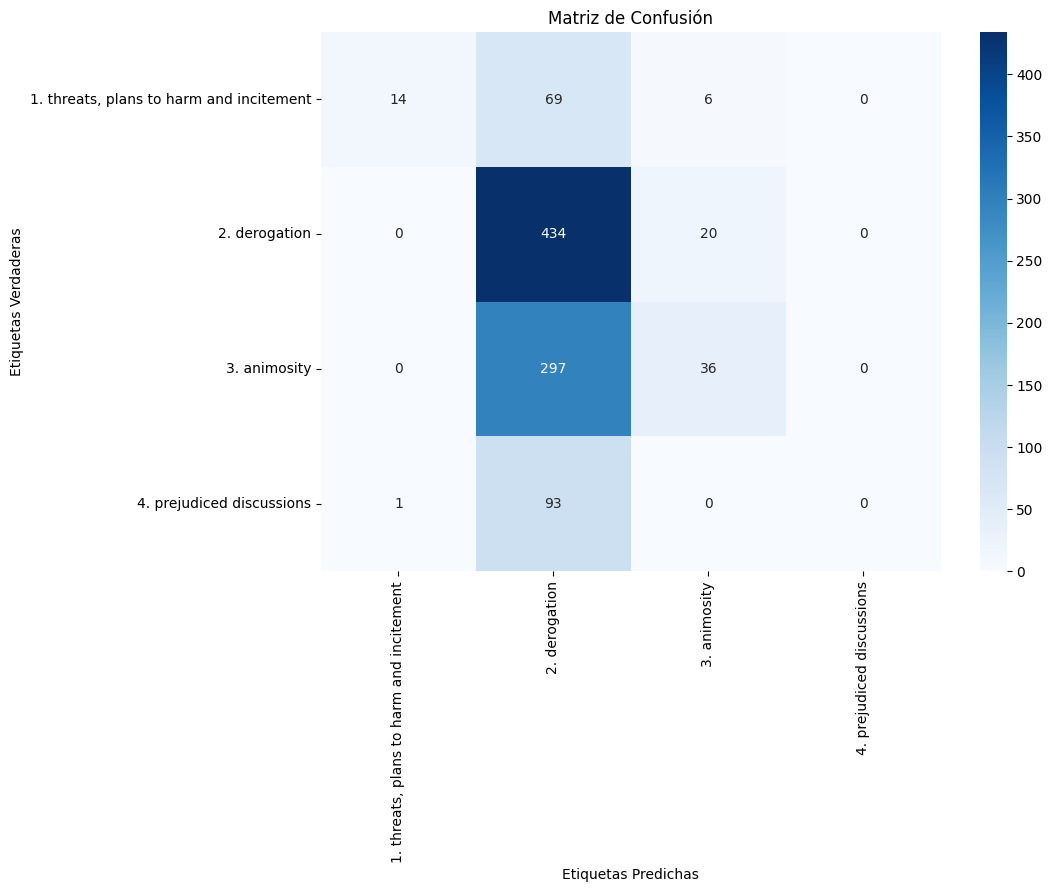

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_num, y_test_pred)



# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report

# Definir el clasificador Random Forest
rf_clf = RandomForestClassifier()

# Definir la grilla de parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt']
}


# Realizar la búsqueda en grilla con validación cruzada
grid_search = HalvingGridSearchCV(rf_clf, param_grid, cv=3, scoring='f1_micro',verbose=3)
grid_search.fit(vectors_train, y_train_num)

# Obtener el mejor clasificador
best_rf_clf = grid_search.best_estimator_


# Evaluar el mejor clasificador en el conjunto de prueba
y_test_pred = best_rf_clf.predict(vectors_test)
print('Métricas en el conjunto de prueba:')
print(classification_report(y_test_num, y_test_pred,target_names=label_names))
micro_f1 = f1_score(y_test_num, y_test_pred, average='micro')
print('Micro-F1 Score: {:.4f}'.format(micro_f1))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 47
max_resources_: 3884
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 47
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.467) total time=   0.3s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.467) total time=   0.3s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.467) total time=   0.5s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


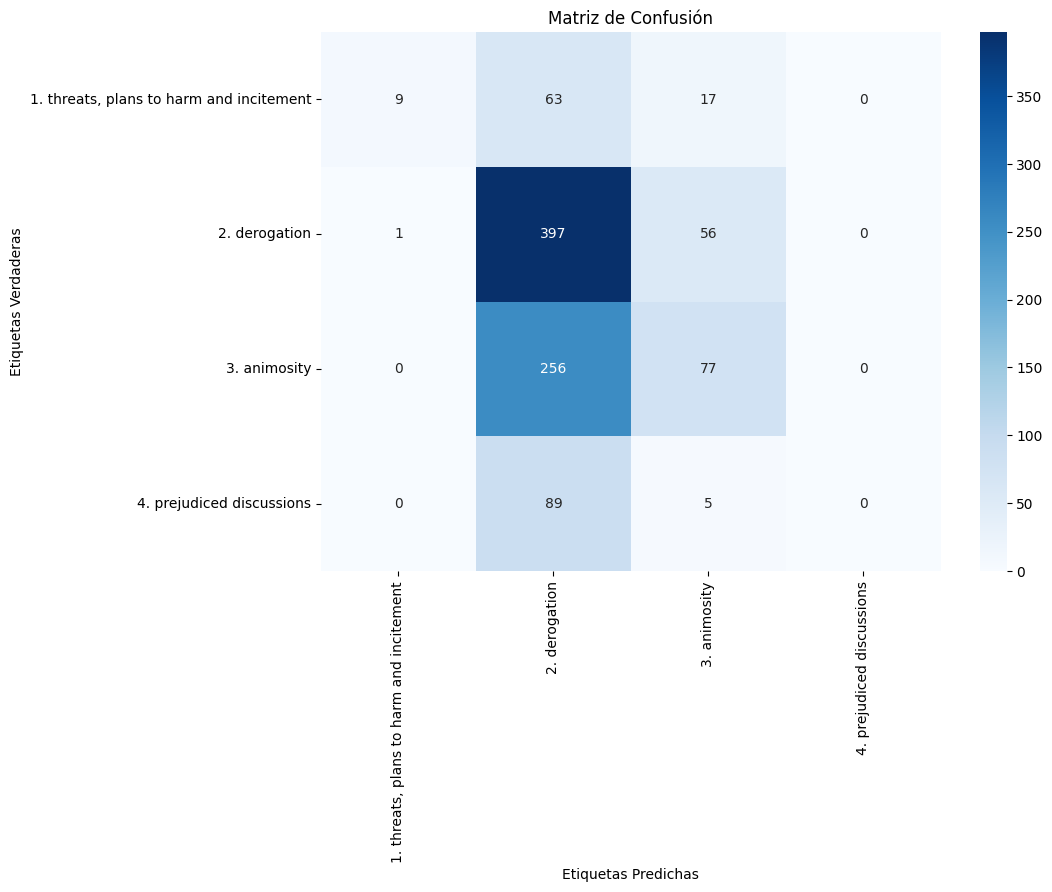

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_num, y_test_pred)



# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Definir el clasificador XGBoost
#xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax', num_class=20, random_state=42)

# Definir la grilla de parámetros para la búsqueda
param_grid = {
    'max_depth': [3, 6],#, 9],
    'learning_rate': [ 0.01],#, 0.001],
    'subsample': [0.8 ]#, 1]
}


# Realizar la búsqueda en grilla con validación cruzada
#grid_search = HalvingGridSearchCV(xgb_clf, param_grid, cv=3, scoring='f1_micro',verbose=3)
#grid_search.fit(vectors_train, y_train_num)

# Obtener el mejor clasificador
#best_xgb_clf = grid_search.best_estimator_

xgb_clf = XGBClassifier(n_estimators=300, max_depth=9, learning_rate=0.1)

xgb_clf.fit(vectors_train, y_train_num, verbose=1)

# Evaluar el mejor clasificador en el conjunto de prueba
y_test_pred = xgb_clf.predict(vectors_test)
print('Métricas en el conjunto de prueba:')
print(classification_report(y_test_num, y_test_pred,target_names=label_names))
micro_f1 = f1_score(y_test_num, y_test_pred, average='micro')
print('Micro-F1 Score: {:.4f}'.format(micro_f1))

Métricas en el conjunto de prueba:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.61      0.26      0.36        89
                           2. derogation       0.51      0.74      0.61       454
                            3. animosity       0.45      0.34      0.39       333
               4. prejudiced discussions       0.54      0.15      0.23        94

                                accuracy                           0.50       970
                               macro avg       0.53      0.37      0.40       970
                            weighted avg       0.50      0.50      0.47       970

Micro-F1 Score: 0.5021


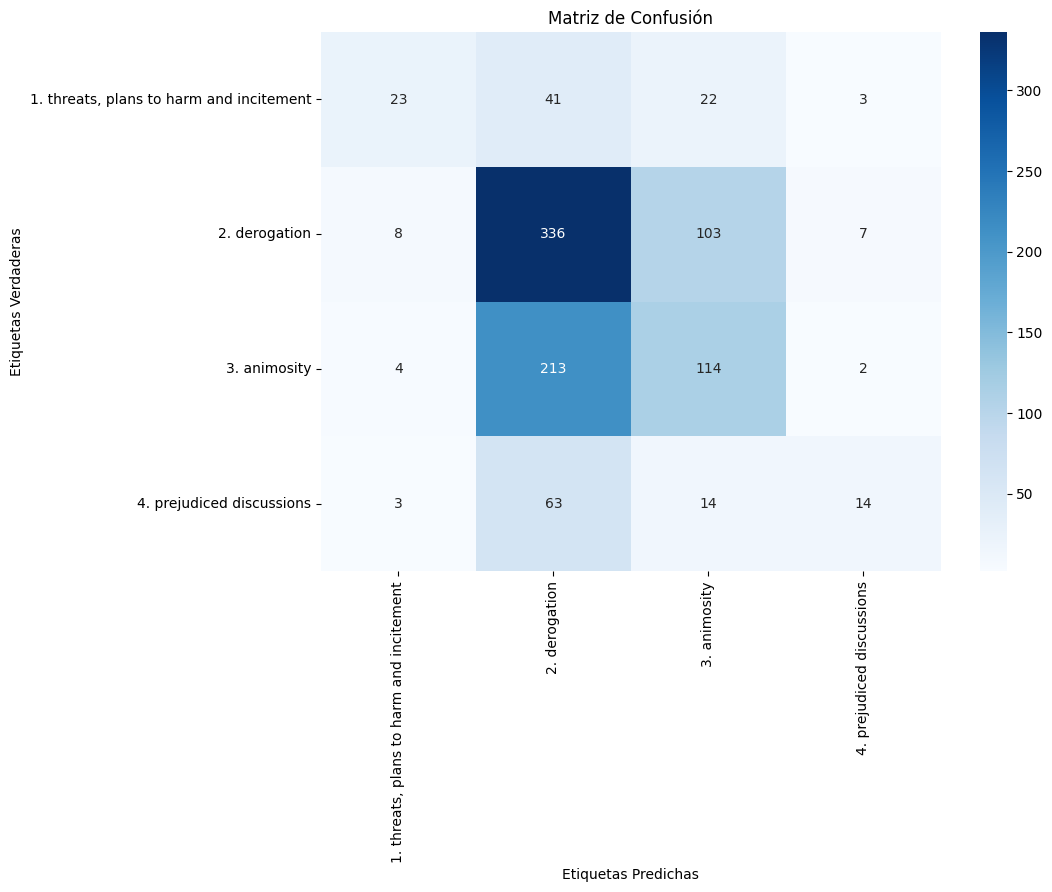

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_num, y_test_pred)



# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# RNN

In [ ]:
import tensorflow as tf

# Suponiendo que 'word2vec_embeddings' es una matriz NumPy que contiene tus embeddings de Word2Vec
# y 'max_vocab' es el tamaño de tu vocabulario

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000000, 300, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20,activation='softmax')
])

model.summary()

In [ ]:
# Configurar el callback de parada temprana
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Compilar el modelo con la función de pérdida y el optimizador adecuados para clasificación multiclase
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(vectors_train, y_train_num, epochs=10, validation_data=(vectors_val, y_val_num), batch_size=16, shuffle=True, callbacks=[early_stop])

Epoch 1/10
377/377 [==============================] - ETA: 0s - loss: 2.9941 - accuracy: 0.0547